# Numerical Computation

### EN: 

Machine learning algorithms usually require a high amount of numerical computation.
This typically refers to algorithms that solve mathematical problems by
methods that update estimates of the solution via an iterative process, rather than
analytically deriving a formula providing a symbolic expression for the correct solution.
Common operations include optimization (ﬁnding the value of an argument
that minimizes or maximizes a function) and solving systems of linear equations.
Even just evaluating a mathematical function on a digital computer can be diﬃcult
when the function involves real numbers, which cannot be represented precisely
using a ﬁnite amount of memory.

### ID: 

Algoritma machine learning biasanya memerlukan banyak perhitungan numerik. Ini umumnya merujuk pada algoritma yang menyelesaikan masalah matematika melalui metode yang memperbarui estimasi solusi secara iteratif, alih-alih secara analitik menurunkan rumus yang memberikan ekspresi simbolik untuk solusi yang benar. Operasi umum mencakup optimisasi (mencari nilai dari suatu argumen yang meminimalkan atau memaksimalkan suatu fungsi) dan menyelesaikan sistem persamaan linear. Bahkan, hanya untuk mengevaluasi suatu fungsi matematika di komputer digital saja bisa menjadi sulit ketika fungsi tersebut melibatkan bilangan real, yang tidak dapat direpresentasikan secara tepat menggunakan jumlah memori yang terbatas.

## Overflow and Underflow

### EN: 
The fundamental diﬃculty in performing continuous math on a digital computer
is that we need to represent inﬁnitely many real numbers with a ﬁnite number
of bit patterns. This means that for almost all real numbers, we incur some
approximation error when we represent the number in the computer. In many
cases, this is just rounding error. Rounding error is problematic, especially when
it compounds across many operations, and can cause algorithms that work in
theory to fail in practice if they are not designed to minimize the accumulation of
rounding error.

One form of rounding error that is particularly devastating is **underflow**. Underflow occurs when numbers near zero are rounded to zero. Many functions behave qualitatively differently when their argument is zero rather than a small positive number. For example, we usually want to avoid division by zero (some software environments will raise exceptions when this occurs, others will return a result with a placeholder "not-a-number" value) or taking the logarithm of zero (this is usually treated as $-\infty$, which then becomes not-a-number if it is used for many further arithmetic operations).

Another highly damaging form of numerical error is **overflow**. Overflow occurs when numbers with large magnitude are approximated as $\infty$ or $-\infty$. Further arithmetic will usually change these infinite values into not-a-number values.

One example of a function that must be stabilized against underflow and overflow is the **softmax function**. The softmax function is often used to predict the probabilities associated with a multinoulli distribution. The softmax function is defined as:

$$
\text{softmax}(x_i) = \frac{\exp(x_i)}{\sum_{j=1}^{n} \exp(x_j)}
$$

Consider what happens when all of the $x_i$ are equal to some constant $c$. Analytically, we can see that all of the outputs should be equal to $\frac{1}{n}$. Numerically, this may not occur when $c$ has large magnitude. If $c$ is very negative, then $\exp(c)$ will underflow. This means the denominator becomes 0, so the result is undefined. When $c$ is very large and positive, $\exp(c)$ will overflow, again resulting in the expression being undefined.

These difficulties can be resolved by evaluating softmax using:

$$
z = x - \max_i x_i
$$

Subtracting $\max_i x_i$ ensures the largest argument to $\exp$ is 0, ruling out overflow. At least one term in the denominator becomes 1, ruling out underflow leading to division by zero.

There is still one issue: underflow in the numerator may still cause the expression to evaluate to zero. This means that implementing $\log(\text{softmax}(x))$ by first computing softmax and then applying $\log$ could return $-\infty$. Instead, a separate, **numerically stable** function should be used to compute log-softmax directly.

In general, we do not always detail all the numerical issues involved in algorithm implementations. Developers of low-level libraries should be cautious and design functions for **numerical stability**. Most users can rely on these libraries for stable implementations of deep learning algorithms.



### ID: 

Kesulitan mendasar dalam melakukan matematika kontinu di komputer digital adalah kita perlu merepresentasikan jumlah bilangan real yang tak hingga dengan jumlah pola bit yang terbatas. Ini berarti bahwa untuk hampir semua bilangan real, akan terjadi kesalahan aproksimasi saat kita merepresentasikan bilangan tersebut di dalam komputer. Dalam banyak kasus, ini hanya berupa kesalahan pembulatan. Kesalahan pembulatan menjadi masalah, terutama ketika kesalahan tersebut terakumulasi dari banyak operasi, dan dapat menyebabkan algoritma yang seharusnya berhasil secara teori justru gagal dalam praktik jika tidak dirancang untuk meminimalkan akumulasi kesalahan pembulatan.

Salah satu bentuk kesalahan pembulatan yang sangat merusak adalah **underflow**. Underflow terjadi ketika angka-angka yang sangat dekat dengan nol dibulatkan menjadi nol. Banyak fungsi berperilaku sangat berbeda ketika argumennya adalah nol dibandingkan dengan angka positif yang sangat kecil. Misalnya, kita biasanya ingin menghindari pembagian dengan nol (beberapa lingkungan perangkat lunak akan menimbulkan pengecualian saat hal ini terjadi, yang lain akan mengembalikan nilai dengan placeholder "not-a-number") atau mengambil logaritma dari nol (biasanya dianggap sebagai $-\infty$, yang kemudian menjadi not-a-number jika digunakan dalam banyak operasi aritmatika selanjutnya).

Bentuk kesalahan numerik lain yang sangat merusak adalah **overflow**. Overflow terjadi ketika angka dengan magnitudo besar didekati sebagai $\infty$ atau $-\infty$. Operasi aritmatika selanjutnya biasanya akan mengubah nilai tak hingga ini menjadi nilai not-a-number.

Contoh fungsi yang harus distabilkan terhadap underflow dan overflow adalah **fungsi softmax**. Fungsi softmax sering digunakan untuk memprediksi probabilitas yang terkait dengan distribusi multinoulli. Fungsi softmax didefinisikan sebagai:

$$
\text{softmax}(x_i) = \frac{\exp(x_i)}{\sum_{j=1}^{n} \exp(x_j)}
$$

Perhatikan apa yang terjadi ketika semua $x_i$ memiliki nilai konstan $c$. Secara analitik, semua output seharusnya bernilai $\frac{1}{n}$. Namun secara numerik, ini bisa tidak terjadi jika $c$ memiliki magnitudo besar. Jika $c$ sangat negatif, maka $\exp(c)$ akan mengalami underflow. Ini berarti penyebut menjadi 0, sehingga hasil akhirnya tidak terdefinisi. Jika $c$ sangat besar dan positif, maka $\exp(c)$ akan mengalami overflow, sehingga ekspresi menjadi tidak terdefinisi.

Kesulitan ini dapat diatasi dengan mengevaluasi softmax menggunakan:

$$
z = x - \max_i x_i
$$

Mengurangkan $\max_i x_i$ memastikan bahwa argumen terbesar untuk $\exp$ adalah 0, sehingga mencegah overflow. Setidaknya satu suku dalam penyebut bernilai 1, sehingga mencegah underflow yang menyebabkan pembagian dengan nol.

Namun masih ada satu masalah: underflow pada pembilang bisa tetap menyebabkan ekspresi bernilai nol. Artinya, jika kita mengimplementasikan $\log(\text{softmax}(x))$ dengan terlebih dahulu menghitung softmax, lalu menerapkan log, hasilnya bisa salah berupa $-\infty$. Sebagai gantinya, kita harus menggunakan fungsi terpisah yang secara **numerik stabil** untuk menghitung log-softmax secara langsung.

Secara umum, kita tidak selalu merinci semua isu numerik dalam implementasi algoritma. Pengembang pustaka level rendah harus memperhatikan stabilitas numerik saat mendesain fungsi. Kebanyakan pengguna cukup mengandalkan pustaka tersebut untuk implementasi algoritma deep learning yang stabil.

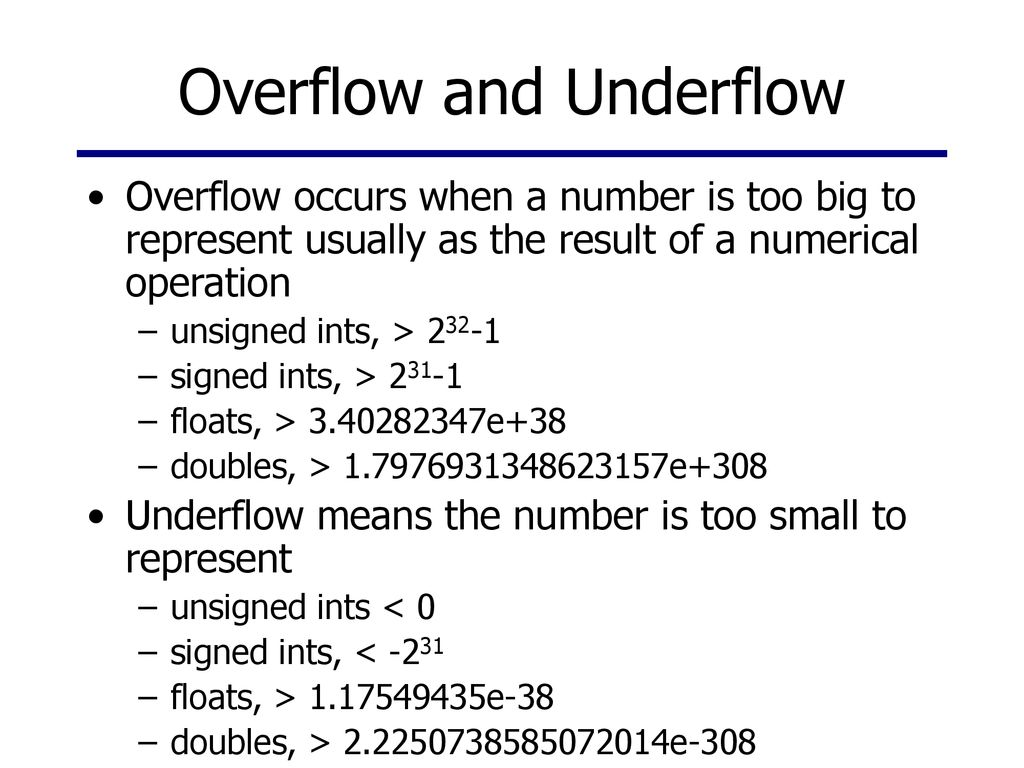

## Poor Conditioning in Scientific Computation

### English Version (EN)

**Conditioning** refers to how rapidly a function changes with respect to small changes in its inputs. Functions that change rapidly when their inputs are perturbed slightly can be problematic for scientific computation because rounding errors in the inputs can result in large changes in the output.

Consider the function:

$$
f(x) = A^{-1}x
$$

When $A \in \mathbb{R}^{n \times n}$ has an eigenvalue decomposition, its **condition number** is defined as:

$$
\kappa(A) = \max_{i,j} \left| \frac{\lambda_i}{\lambda_j} \right|
$$

This is the ratio of the magnitude of the largest and smallest eigenvalue. When this number is large, **matrix inversion** becomes particularly sensitive to error in the input.

> ⚠️ This sensitivity is an **intrinsic property** of the matrix itself, not merely the result of rounding error during matrix inversion.

Poorly conditioned matrices **amplify pre-existing errors** when we multiply by the true matrix inverse. In practice, the error will be further **compounded** by numerical errors in the inversion process itself.

---

### Versi Bahasa Indonesia (ID)

**Conditioning** mengacu pada seberapa cepat sebuah fungsi berubah terhadap perubahan kecil pada inputnya. Fungsi yang berubah dengan sangat cepat saat inputnya sedikit terganggu dapat menjadi masalah dalam komputasi ilmiah, karena **kesalahan pembulatan** pada input dapat menghasilkan perubahan besar pada output.

Perhatikan fungsi berikut:

$$
f(x) = A^{-1}x
$$

Ketika $A \in \mathbb{R}^{n \times n}$ memiliki dekomposisi eigen, maka **angka kondisi (condition number)** didefinisikan sebagai:

$$
\kappa(A) = \max_{i,j} \left| \frac{\lambda_i}{\lambda_j} \right|
$$

Ini adalah rasio antara magnitudo dari nilai eigen terbesar dan terkecil. Jika angka ini besar, maka **pembalikan matriks** menjadi sangat sensitif terhadap kesalahan pada input.

> ⚠️ Sensitivitas ini adalah **karakteristik intrinsik** dari matriks itu sendiri, bukan hanya akibat dari kesalahan pembulatan selama proses pembalikan matriks.

Matriks yang buruk kondisinya (**poorly conditioned**) akan **memperkuat kesalahan yang sudah ada sebelumnya** saat kita mengalikannya dengan invers matriks yang sebenarnya. Dalam praktiknya, kesalahan ini akan semakin **bertambah besar** karena kesalahan numerik dalam proses inversi itu sendiri.


## Gradient-Based Optimization

### English

Most deep learning algorithms involve optimization of some sort. Optimization refers to the task of either minimizing or maximizing some function \( f(x) \) by altering \( x \). We usually phrase most optimization problems in terms of minimizing \( f(x) \). Maximization may be accomplished via a minimization algorithm by minimizing \( -f(x) \).

The function we want to minimize or maximize is called the **objective function** or **criterion**. When we are minimizing it, we may also call it the **cost function**, **loss function**, or **error function**. In this book, we use these terms interchangeably, though some machine learning publications assign special meaning to some of these terms.

We often denote the value that minimizes or maximizes a function with a superscript *. For example, we might say

$$
x^* = \arg\min f(x)
$$

We assume the reader is already familiar with calculus, but provide a brief review of how calculus concepts relate to optimization here.

Suppose we have a function \( y = f(x) \), where both \( x \) and \( y \) are real numbers. The **derivative** of this function is denoted as \( f'(x) \) or as \( \frac{dy}{dx} \). The derivative \( f'(x) \) gives the slope of \( f(x) \) at the point \( x \). In other words, it specifies how to scale a small change in the input in order to obtain the corresponding change in the output:

$$
f(x + \epsilon) \approx f(x) + \epsilon f'(x)
$$

The derivative is therefore useful for minimizing a function because it tells us how to change \( x \) in order to make a small improvement in \( y \). For example, we know that

$$
f(x - \epsilon \cdot \text{sign}(f'(x))) < f(x)
$$

for small enough \( \epsilon \). We can thus reduce \( f(x) \) by moving \( x \) in small steps with opposite sign of the derivative. This technique is called **gradient descent** (Cauchy, 1847).

When \( f'(x) = 0 \), the derivative provides no information about which direction to move. Points where \( f'(x) = 0 \) are known as **critical points** or **stationary points**.

A **local minimum** is a point where \( f(x) \) is lower than at all neighboring points, so it is no longer possible to decrease \( f(x) \) by making infinitesimal steps.

A **local maximum** is a point where \( f(x) \) is higher than at all neighboring points, so it is not possible to increase \( f(x) \) by making infinitesimal steps.

Some critical points are neither maxima nor minima. These are known as **saddle points**. See Fig. 4.2 for examples of each type of critical point.

A point that obtains the absolute lowest value of \( f(x) \) is a **global minimum**. It is possible for there to be only one global minimum or multiple global minima of the function. It is also possible for there to be local minima that are not globally optimal.

In the context of deep learning, we optimize functions that may have many local minima that are not optimal, and many saddle points surrounded by very flat regions. All of this makes optimization very difficult, especially when the input to the function is multidimensional.

We therefore usually settle for finding a value of \( f \) that is very low, but not necessarily minimal in any formal sense.

We often minimize functions that have multiple inputs:

$$
f : \mathbb{R}^n \to \mathbb{R}
$$

For the concept of “minimization” to make sense, there must still be only one (scalar) output.

For functions with multiple inputs, we must make use of the concept of **partial derivatives**. The partial derivative \( \frac{\partial f(x)}{\partial x_i} \) measures how \( f \) changes as only the variable \( x_i \) increases at point \( x \).

The **gradient** generalizes the notion of derivative to the case where the derivative is with respect to a vector: the gradient of \( f \) is the vector containing all of the partial derivatives, denoted

$$
\nabla_x f(x)
$$

Element \( i \) of the gradient is the partial derivative of \( f \) with respect to \( x_i \). In multiple dimensions, critical points are points where every element of the gradient is equal to zero.

The **directional derivative** in direction \( u \) (a unit vector) is the slope of the function \( f \) in direction \( u \). In other words, the directional derivative is the derivative of the function \( f(x + \alpha u) \) with respect to \( \alpha \), evaluated at \( \alpha = 0 \). Using the chain rule, we can see that:

$$
\frac{\partial}{\partial \alpha} f(x + \alpha u) = u^\top \nabla_x f(x)
$$

To minimize \( f \), we would like to find the direction in which \( f \) decreases the fastest. We can do this using the directional derivative:

$$
\min_{u, \|u\| = 1} u^\top \nabla_x f(x) \tag{4.3}
$$

This is minimized when the cosine of the angle \( \theta \) between \( u \) and the gradient is \( -1 \):

$$
\min_u u^\top \nabla_x f(x) = \min_u \| \nabla_x f(x) \|_2 \cos(\theta) \tag{4.4}
$$

Substituting in \( \|u\|_2 = 1 \) and ignoring factors that do not depend on \( u \), this simplifies to minimizing \( \cos(\theta) \). This is minimized when \( u \) points in the opposite direction as the gradient. In other words, the gradient points directly uphill, and the negative gradient points directly downhill.

We can decrease \( f \) by moving in the direction of the **negative gradient**. This is known as the **method of steepest descent** or **gradient descent**.

**Steepest descent** proposes a new point:

$$
x' = x - \epsilon \nabla_x f(x) \tag{4.5}
$$

where \( \epsilon \) is the **learning rate**, a positive scalar determining the size of the step.

We can choose \( \epsilon \) in several different ways. A popular approach is to set \( \epsilon \) to a small constant. Sometimes, we can solve for the step size that makes the directional derivative vanish.

Another approach is to evaluate \( f(x - \epsilon \nabla_x f(x)) \) for several values of \( \epsilon \) and choose the one that results in the smallest objective function value. This last strategy is called a **line search**.

**Steepest descent converges** when every element of the gradient is zero (or, in practice, very close to zero). In some cases, we may be able to avoid running this iterative algorithm, and just jump directly to the critical point by solving the equation:

$$
\nabla_x f(x) = 0
$$

Although gradient descent is limited to optimization in continuous spaces, the general concept of making small moves (that are approximately the best small move) towards better configurations can be generalized to discrete spaces.

Ascending an objective function of discrete parameters is called **hill climbing** (Russell and Norvig, 2003).


### Indonesian

## Optimisasi Berbasis Gradien

Sebagian besar algoritma deep learning melibatkan proses optimisasi. Optimisasi mengacu pada tugas untuk meminimalkan atau memaksimalkan suatu fungsi \( f(x) \) dengan mengubah \( x \). Biasanya, kita menyusun masalah optimisasi dalam bentuk meminimalkan \( f(x) \). Maksimisasi dapat dilakukan dengan algoritma minimisasi dengan meminimalkan \( -f(x) \).

Fungsi yang ingin kita minimalkan atau maksimalkan disebut sebagai **fungsi objektif** atau **kriteria**. Ketika kita meminimalkannya, kita juga bisa menyebutnya **fungsi biaya**, **fungsi kerugian**, atau **fungsi galat**. Dalam buku ini, kita menggunakan istilah-istilah tersebut secara bergantian, meskipun beberapa publikasi machine learning memberikan makna khusus pada istilah-istilah tersebut.

Kita sering menyatakan nilai yang meminimalkan atau memaksimalkan suatu fungsi dengan superskrip *. Misalnya:

$$
x^* = \arg\min f(x)
$$

Kita mengasumsikan pembaca sudah familiar dengan kalkulus, namun kita akan memberikan ulasan singkat tentang bagaimana konsep kalkulus berhubungan dengan optimisasi.

Misalkan kita memiliki fungsi \( y = f(x) \), di mana baik \( x \) maupun \( y \) adalah bilangan real. **Turunan** dari fungsi ini dilambangkan sebagai \( f'(x) \) atau \( \frac{dy}{dx} \). Turunan \( f'(x) \) memberikan kemiringan dari \( f(x) \) pada titik \( x \). Dengan kata lain, turunan menunjukkan bagaimana perubahan kecil pada input mengubah output:

$$
f(x + \epsilon) \approx f(x) + \epsilon f'(x)
$$

Turunan sangat berguna untuk meminimalkan suatu fungsi karena ia memberitahu kita bagaimana mengubah \( x \) untuk mendapatkan penurunan kecil pada \( y \). Sebagai contoh:

$$
f(x - \epsilon \cdot \text{sign}(f'(x))) < f(x)
$$

untuk \( \epsilon \) yang cukup kecil. Maka kita bisa menurunkan \( f(x) \) dengan mengubah \( x \) secara kecil-kecilan berlawanan arah dengan tanda dari turunannya. Teknik ini disebut **gradient descent** (Cauchy, 1847).

Ketika \( f'(x) = 0 \), turunan tidak memberikan informasi arah pergerakan. Titik-titik di mana \( f'(x) = 0 \) disebut sebagai **titik kritis** atau **titik stasioner**.

**Minimum lokal** adalah titik di mana \( f(x) \) lebih rendah dari semua titik tetangganya, sehingga tidak mungkin mengurangi \( f(x) \) lagi dengan langkah kecil.

**Maksimum lokal** adalah titik di mana \( f(x) \) lebih tinggi dari semua titik tetangganya, sehingga tidak mungkin menaikkan \( f(x) \) lagi dengan langkah kecil.

Beberapa titik kritis bukan maksimum maupun minimum. Ini disebut sebagai **titik pelana** (*saddle point*). Lihat Gambar 4.2 untuk contoh masing-masing jenis titik kritis.

Titik yang menghasilkan nilai absolut terendah dari \( f(x) \) disebut sebagai **minimum global**. Bisa saja hanya ada satu minimum global atau beberapa. Juga bisa terdapat minimum lokal yang bukan merupakan solusi optimal secara global.

Dalam konteks deep learning, kita sering mengoptimalkan fungsi yang memiliki banyak minimum lokal yang tidak optimal, dan banyak titik pelana dengan daerah datar di sekitarnya. Hal ini membuat optimisasi menjadi sangat sulit, terutama ketika input dari fungsi tersebut multidimensi.

Oleh karena itu, kita biasanya cukup puas dengan menemukan nilai \( f \) yang cukup rendah, meskipun tidak benar-benar minimal secara formal.

Kita sering meminimalkan fungsi yang memiliki banyak input:

$$
f : \mathbb{R}^n \to \mathbb{R}
$$

Agar konsep “minimisasi” masuk akal, output dari fungsi tersebut tetap harus berupa skalar (tunggal).

Untuk fungsi dengan banyak input, kita harus menggunakan konsep **turunan parsial**. Turunan parsial \( \frac{\partial f(x)}{\partial x_i} \) mengukur bagaimana \( f \) berubah ketika hanya variabel \( x_i \) yang dinaikkan pada titik \( x \).

**Gradien** menggeneralisasi konsep turunan untuk kasus ketika turunan dihitung terhadap vektor: gradien dari \( f \) adalah vektor yang berisi semua turunan parsial, dilambangkan:

$$
\nabla_x f(x)
$$

Elemen ke-\( i \) dari gradien adalah turunan parsial dari \( f \) terhadap \( x_i \). Dalam dimensi jamak, titik kritis adalah titik di mana semua elemen gradien bernilai nol.

**Turunan arah** dalam arah \( u \) (vektor satuan) adalah kemiringan fungsi \( f \) dalam arah \( u \). Artinya, turunan arah adalah turunan dari fungsi \( f(x + \alpha u) \) terhadap \( \alpha \), dievaluasi pada \( \alpha = 0 \). Dengan menggunakan aturan rantai, kita dapatkan:

$$
\frac{\partial}{\partial \alpha} f(x + \alpha u) = u^\top \nabla_x f(x)
$$

Untuk meminimalkan \( f \), kita ingin menemukan arah di mana \( f \) menurun paling cepat. Kita bisa lakukan ini menggunakan turunan arah:

$$
\min_{u, \|u\| = 1} u^\top \nabla_x f(x) \tag{4.3}
$$

Ekspresi ini diminimalkan ketika cosinus sudut \( \theta \) antara \( u \) dan gradien bernilai \( -1 \):

$$
\min_u u^\top \nabla_x f(x) = \min_u \| \nabla_x f(x) \|_2 \cos(\theta) \tag{4.4}
$$

Dengan mensubstitusikan \( \|u\|_2 = 1 \) dan mengabaikan faktor yang tidak tergantung pada \( u \), ini disederhanakan menjadi meminimalkan \( \cos(\theta) \). Ini terjadi saat \( u \) berlawanan arah dengan gradien. Artinya, gradien menunjuk langsung ke arah naik, dan gradien negatif menunjuk ke arah turun.

Kita dapat menurunkan nilai \( f \) dengan bergerak dalam arah **negatif gradien**. Ini dikenal sebagai metode **penurunan paling curam** atau **gradient descent**.

**Penurunan paling curam** mengusulkan titik baru:

$$
x' = x - \epsilon \nabla_x f(x) \tag{4.5}
$$

di mana \( \epsilon \) adalah **laju pembelajaran** (*learning rate*), yaitu skalar positif yang menentukan ukuran langkah.

Kita dapat memilih \( \epsilon \) dengan beberapa cara. Pendekatan yang umum adalah menetapkan \( \epsilon \) sebagai konstanta kecil. Terkadang, kita bisa menyelesaikan nilai langkah yang membuat turunan arah menjadi nol.

Pendekatan lain adalah dengan mengevaluasi \( f(x - \epsilon \nabla_x f(x)) \) untuk beberapa nilai \( \epsilon \) dan memilih yang menghasilkan nilai fungsi objektif terkecil. Strategi ini disebut **line search**.

**Gradient descent** berhenti ketika setiap elemen dari gradien adalah nol (atau, dalam praktiknya, sangat dekat nol). Dalam beberapa kasus, kita bisa menghindari proses iteratif ini dan langsung menuju titik kritis dengan menyelesaikan persamaan:

$$
\nabla_x f(x) = 0
$$

Meskipun gradient descent terbatas pada optimisasi dalam ruang kontinu, konsep umum untuk melakukan pergerakan kecil menuju konfigurasi yang lebih baik dapat digeneralisasi ke ruang diskrit.

Proses menaikkan fungsi objektif pada parameter diskrit disebut sebagai **hill climbing** (Russell dan Norvig, 2003).


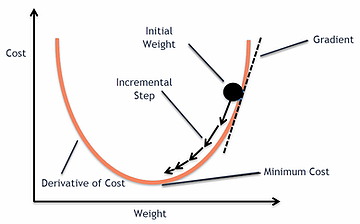

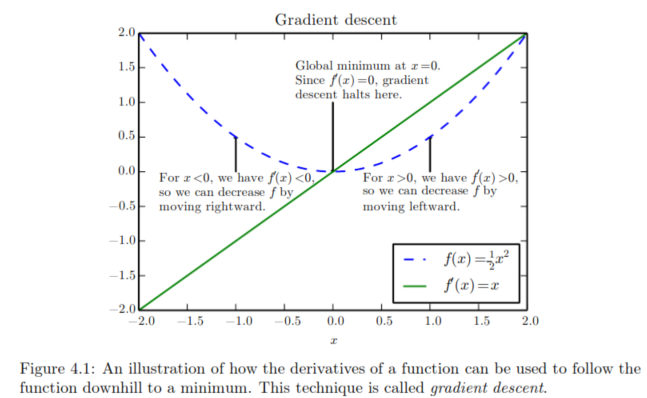

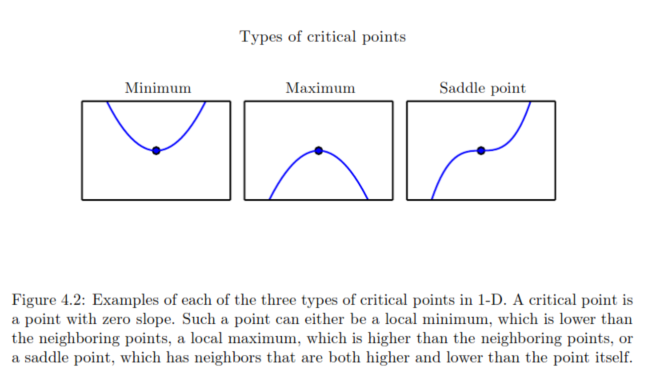

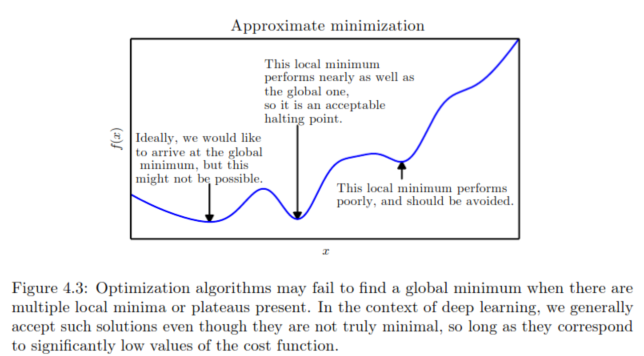

## Beyond the Gradient: Jacobian and Hessian Matrices

### English

Sometimes we need to find all of the partial derivatives of a function whose input and output are both vectors. The matrix containing all such partial derivatives is known as a **Jacobian matrix**. Specifically, if we have a function $f : \mathbb{R}^m \rightarrow \mathbb{R}^n$, then the Jacobian matrix $J \in \mathbb{R}^{n \times m}$ of $f$ is defined such that:

$$
J_{i,j} = \frac{\partial f_i(\mathbf{x})}{\partial x_j}
$$

We are also sometimes interested in a derivative of a derivative. This is known as a **second derivative**. For example, for a function $f : \mathbb{R}^n \rightarrow \mathbb{R}$, the second partial derivative is denoted as:

$$
\frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j}
$$

In a single dimension, we denote the second derivative as:

$$
\frac{d^2 f(x)}{dx^2} = f''(x)
$$

The second derivative tells us how the first derivative changes as we vary the input. This tells us whether a gradient step will cause the expected improvement. The second derivative measures **curvature**.

- If the second derivative is zero, the function is flat and predictable using just the gradient.
- If the second derivative is negative, the function curves downward — improvement is greater than expected.
- If the second derivative is positive, the function curves upward — improvement is less than expected.

When a function has multiple input dimensions, the second derivatives are collected in a matrix called the **Hessian matrix**:

$$
H(f)(\mathbf{x})_{i,j} = \frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j}
$$

Equivalently, the Hessian is the Jacobian of the gradient. If all second partial derivatives are continuous, the order of differentiation can be swapped:

$$
\frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j} = \frac{\partial^2 f(\mathbf{x})}{\partial x_j \partial x_i}
$$

This implies that the Hessian is symmetric. A real symmetric Hessian can be decomposed into real eigenvalues and an orthogonal basis of eigenvectors. The second directional derivative in direction $\mathbf{d}$ is given by:

$$
\mathbf{d}^\top H \mathbf{d}
$$

- If $\mathbf{d}$ is an eigenvector of $H$, the second directional derivative equals the corresponding eigenvalue.
- In general, it's a weighted average of all eigenvalues.

The **maximum eigenvalue** determines the maximum second derivative; the **minimum eigenvalue**, the minimum second derivative.

We can make a second-order Taylor expansion of $f(\mathbf{x})$ around a point $\mathbf{x}^{(0)}$:

$$
f(\mathbf{x}) \approx f(\mathbf{x}^{(0)}) + (\mathbf{x} - \mathbf{x}^{(0)})^\top \mathbf{g} + \frac{1}{2}(\mathbf{x} - \mathbf{x}^{(0)})^\top H (\mathbf{x} - \mathbf{x}^{(0)})
$$

where $\mathbf{g}$ is the gradient and $H$ is the Hessian at $\mathbf{x}^{(0)}$. If we use a learning rate $\epsilon$, then:

$$
\mathbf{x} = \mathbf{x}^{(0)} - \epsilon \mathbf{g}
$$

Substituting this into the approximation:

$$
f(\mathbf{x}^{(0)} - \epsilon \mathbf{g}) \approx f(\mathbf{x}^{(0)}) - \epsilon \mathbf{g}^\top \mathbf{g} + \frac{1}{2} \epsilon^2 \mathbf{g}^\top H \mathbf{g}
$$

This has three terms:

1. The current value of the function.
2. The expected improvement from the gradient.
3. The correction due to curvature.

If $\mathbf{g}^\top H \mathbf{g}$ is large, the step may go uphill. If $\mathbf{g}^\top H \mathbf{g} \leq 0$, increasing $\epsilon$ will seemingly decrease $f$ indefinitely (although the Taylor approximation will no longer hold for large $\epsilon$). The optimal step size is:

$$
\epsilon^* = \frac{\mathbf{g}^\top \mathbf{g}}{\mathbf{g}^\top H \mathbf{g}}
$$

If $\mathbf{g}$ aligns with the largest eigenvalue $\lambda_{max}$ of $H$, then:

$$
\epsilon^* = \frac{1}{\lambda_{max}}
$$

This shows the importance of Hessian eigenvalues in determining learning rate scale.

The **second derivative test** helps classify critical points ($f'(x)=0$):

- If $f''(x) > 0$, it's a local minimum.
- If $f''(x) < 0$, it's a local maximum.
- If $f''(x) = 0$, the test is inconclusive.

In multiple dimensions, at a critical point where $\nabla f(\mathbf{x}) = 0$, the eigenvalues of the Hessian determine the nature of the point:

- All positive: local minimum.
- All negative: local maximum.
- Mixed signs: saddle point.
- One or more zero eigenvalues: inconclusive.

The **condition number** of the Hessian describes variation in second derivatives. A poorly conditioned Hessian (with very large and small eigenvalues) leads to inefficient gradient descent.

This can be resolved using **Newton’s Method**, which uses the second-order Taylor approximation. Solving for the critical point of the approximation:

$$
\mathbf{x}^* = \mathbf{x}^{(0)} - H^{-1} \nabla f(\mathbf{x}^{(0)})
$$

For a positive definite quadratic, Newton’s method finds the minimum in one step. For general functions, it is iteratively applied to converge to a critical point.

- Newton’s method is only reliable near local minima.
- It can diverge near saddle points.

**First-order methods** (like gradient descent) use only the gradient.  
**Second-order methods** (like Newton’s) also use the Hessian.

In deep learning, these methods are used without strong guarantees, due to function complexity. Constraints like **Lipschitz continuity** help establish some guarantees:

$$
\forall x, y, \quad |f(x) - f(y)| \leq L \|x - y\|_2
$$

This bounds the rate of change and supports the stability of optimization steps.

**Convex optimization** is a specialized field with strong guarantees. It applies only to convex functions (Hessian is positive semidefinite everywhere). Convex functions have no saddle points and their local minima are global.

However, most deep learning problems are not convex. While convex optimization principles can aid in analysis, they have limited direct application in deep learning.


### Indonesian:

Terkadang kita perlu menghitung seluruh turunan parsial dari suatu fungsi yang input dan output-nya berupa vektor. Matriks yang memuat semua turunan parsial ini dikenal sebagai **matriks Jacobian**. Secara khusus, jika kita memiliki fungsi $f: \mathbb{R}^m \rightarrow \mathbb{R}^n$, maka **matriks Jacobian** $J \in \mathbb{R}^{n \times m}$ dari $f$ didefinisikan sebagai:

$$
J_{i,j} = \frac{\partial f_i(\mathbf{x})}{\partial x_j}
$$

Kita juga terkadang tertarik pada turunan dari turunan, yang disebut **turunan kedua**. Misalnya, untuk fungsi $f: \mathbb{R}^n \rightarrow \mathbb{R}$, maka turunan terhadap $x_i$ dari turunan $f$ terhadap $x_j$ dituliskan:

$$
\frac{\partial^2 f}{\partial x_i \partial x_j}
$$

Dalam satu dimensi, kita bisa menuliskan:

$$
\frac{d^2 f}{dx^2} = f''(x)
$$

Turunan kedua memberi tahu kita bagaimana turunan pertama berubah terhadap input. Ini penting karena menjelaskan apakah langkah gradien akan menghasilkan peningkatan sebagaimana yang diharapkan dari gradien saja. Kita bisa menganggap turunan kedua sebagai ukuran kelengkungan fungsi.

Misalkan kita memiliki fungsi kuadrat (banyak fungsi dalam praktik memang bukan kuadrat, namun bisa diaproksimasi secara lokal sebagai fungsi kuadrat). Jika fungsi tersebut memiliki turunan kedua nol, maka fungsi tersebut adalah garis datar sempurna.

- Jika gradien bernilai $-\epsilon$, maka kita dapat melangkah sebesar $\frac{1}{\epsilon}$ dan fungsi akan berkurang sebesar $\epsilon$.
- Jika turunan kedua negatif, maka fungsi melengkung ke bawah dan penurunan nilai fungsi akan lebih dari $\epsilon$.
- Jika turunan kedua positif, maka fungsi melengkung ke atas dan penurunan fungsi kurang dari $\epsilon$.

Ketika fungsi memiliki banyak dimensi input, terdapat banyak turunan kedua yang dapat dikumpulkan dalam **matriks Hessian**. Matriks Hessian $H_f(\mathbf{x})$ didefinisikan sebagai:

$$
H_{i,j} = \frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j}
$$

Matriks Hessian adalah Jacobian dari gradien. Jika seluruh turunan parsial kedua kontinu, maka operator diferensial bersifat komutatif:

$$
\frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j} = \frac{\partial^2 f(\mathbf{x})}{\partial x_j \partial x_i}
$$

Artinya, $H_{i,j} = H_{j,i}$ sehingga Hessian bersifat simetris. Sebagian besar fungsi dalam deep learning memiliki Hessian simetris hampir di seluruh domain-nya.

Karena Hessian bersifat real dan simetris, maka bisa didekomposisi menjadi eigenvalue dan basis ortogonal dari eigenvector. Turunan kedua pada arah tertentu $d$ (vektor satuan) diberikan oleh:

$$
d^\top H d
$$

Jika $d$ adalah eigenvector dari $H$, maka turunan kedua searah $d$ adalah nilai eigen terkait. Untuk arah lain, turunan tersebut adalah rata-rata tertimbang dari semua eigenvalue, dengan bobot lebih besar untuk arah yang searah $d$.

Turunan kedua menentukan seberapa baik langkah gradien akan bekerja. Kita dapat membuat aproksimasi deret Taylor orde dua terhadap fungsi $f(\mathbf{x})$ di sekitar titik $\mathbf{x}^{(0)}$:

$$
f(\mathbf{x}) \approx f(\mathbf{x}^{(0)}) + (\mathbf{x} - \mathbf{x}^{(0)})^\top \mathbf{g} + \frac{1}{2} (\mathbf{x} - \mathbf{x}^{(0)})^\top H (\mathbf{x} - \mathbf{x}^{(0)})
$$

Dengan $\mathbf{g}$ adalah gradien dan $H$ adalah Hessian di $\mathbf{x}^{(0)}$. Misal kita gunakan laju pembelajaran $\epsilon$, maka:

$$
\mathbf{x} = \mathbf{x}^{(0)} - \epsilon \mathbf{g}
$$

Substitusi ke dalam deret Taylor menghasilkan:

$$
f(\mathbf{x}^{(0)} - \epsilon \mathbf{g}) \approx f(\mathbf{x}^{(0)}) - \epsilon \mathbf{g}^\top \mathbf{g} + \frac{1}{2} \epsilon^2 \mathbf{g}^\top H \mathbf{g}
$$

Jika $\mathbf{g}^\top H \mathbf{g} \leq 0$, maka peningkatan fungsi bisa berlanjut seiring bertambahnya $\epsilon$. Tapi dalam praktik, aproksimasi Taylor tidak akurat untuk $\epsilon$ besar. Jika $\mathbf{g}^\top H \mathbf{g} > 0$, maka laju pembelajaran optimal:

$$
\epsilon^* = \frac{\mathbf{g}^\top \mathbf{g}}{\mathbf{g}^\top H \mathbf{g}}
$$

Jika gradien sejajar dengan eigenvector dari nilai eigen terbesar $\lambda_{\text{max}}$, maka $\epsilon^* = \frac{1}{\lambda_{\text{max}}}$. Ini menjelaskan bahwa eigenvalue Hessian menentukan skala laju pembelajaran.

Turunan kedua juga bisa digunakan untuk menguji titik kritis:

- Jika $f''(x) > 0$ dan $f'(x) = 0$, maka $x$ adalah **minimum lokal**.
- Jika $f''(x) < 0$, maka **maksimum lokal**.
- Jika $f''(x) = 0$, maka **tidak dapat disimpulkan** (mungkin saddle point atau datar).

Dalam banyak dimensi, kita gunakan **dekomposisi eigen** dari Hessian:

- Jika semua eigenvalue positif → **minimum lokal**
- Jika semua negatif → **maksimum lokal**
- Jika campuran positif dan negatif → **saddle point**
- Jika satu eigenvalue nol → **inconclusive**

**Condition number** dari Hessian menunjukkan seberapa bervariasinya turunan kedua. Jika terlalu besar (buruk), maka gradient descent berjalan buruk karena arah dengan kurvatur kuat mengharuskan langkah kecil, tapi arah lain butuh langkah besar.

Hal ini bisa diatasi dengan menggunakan informasi dari Hessian, contohnya metode **Newton**:

$$
\mathbf{x}^* = \mathbf{x}^{(0)} - H^{-1} \nabla f(\mathbf{x}^{(0)})
$$

Jika fungsi kuadrat positif-definit, metode ini bisa langsung menuju minimum. Jika tidak, kita bisa mengulanginya iteratif. Newton lebih cepat dari gradient descent di dekat minimum lokal, tapi berbahaya di dekat saddle point.

- **First-order optimization**: hanya gunakan gradien.
- **Second-order optimization**: gunakan juga Hessian (misal Newton).

Algoritma optimisasi dalam deep learning jarang memberi jaminan kuat karena fungsi yang kompleks. Beberapa jaminan dapat diperoleh jika fungsi memiliki **kontinuitas Lipschitz**:

$$
\forall x,y: |f(x) - f(y)| \leq L \|x - y\|_2
$$

Ini menyiratkan bahwa perubahan kecil pada input menghasilkan perubahan kecil pula pada output.

Bidang optimisasi yang paling sukses adalah **optimisasi konveks**, yang hanya berlaku pada fungsi konveks (Hessian semidefinit positif di seluruh domain). Semua minimum lokal juga merupakan minimum global. Sayangnya, sebagian besar permasalahan deep learning tidak konveks.

Untuk referensi lebih lanjut tentang optimisasi konveks, lihat:

- Boyd and Vandenberghe (2004)
- Rockafellar (1997)


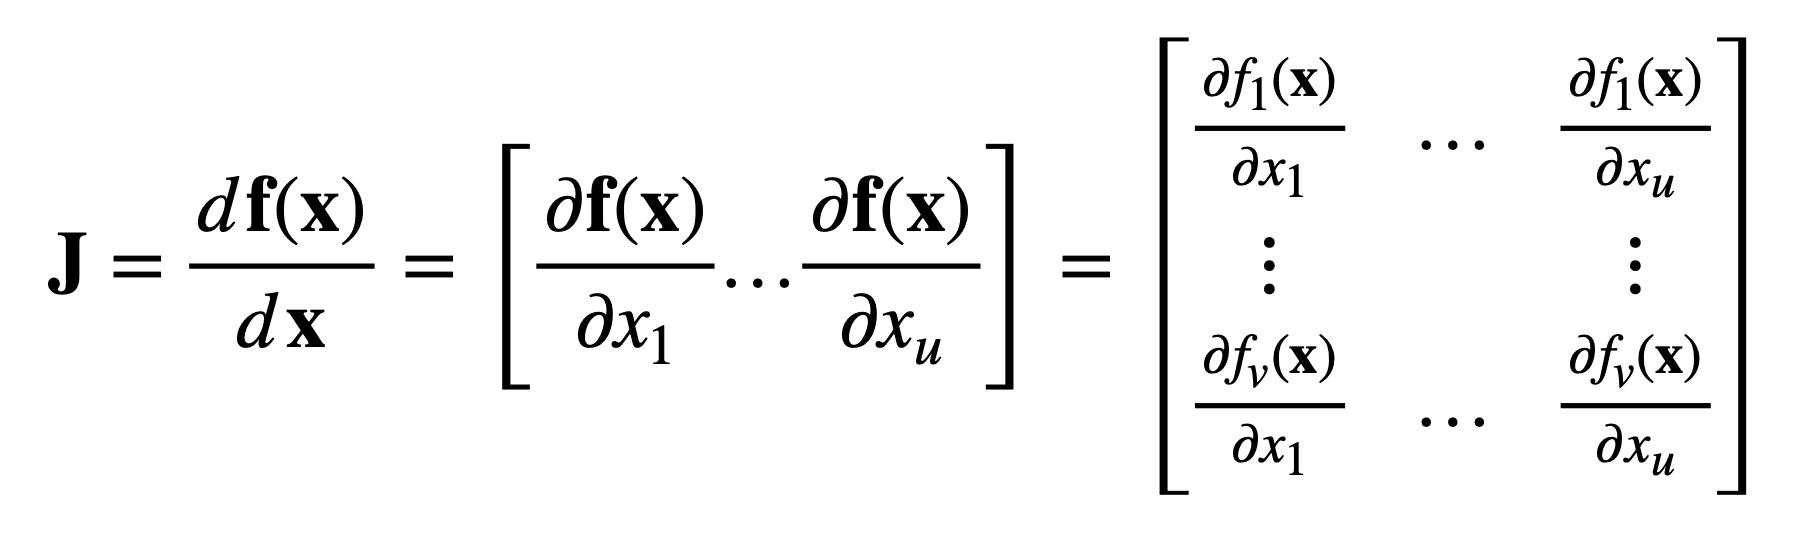

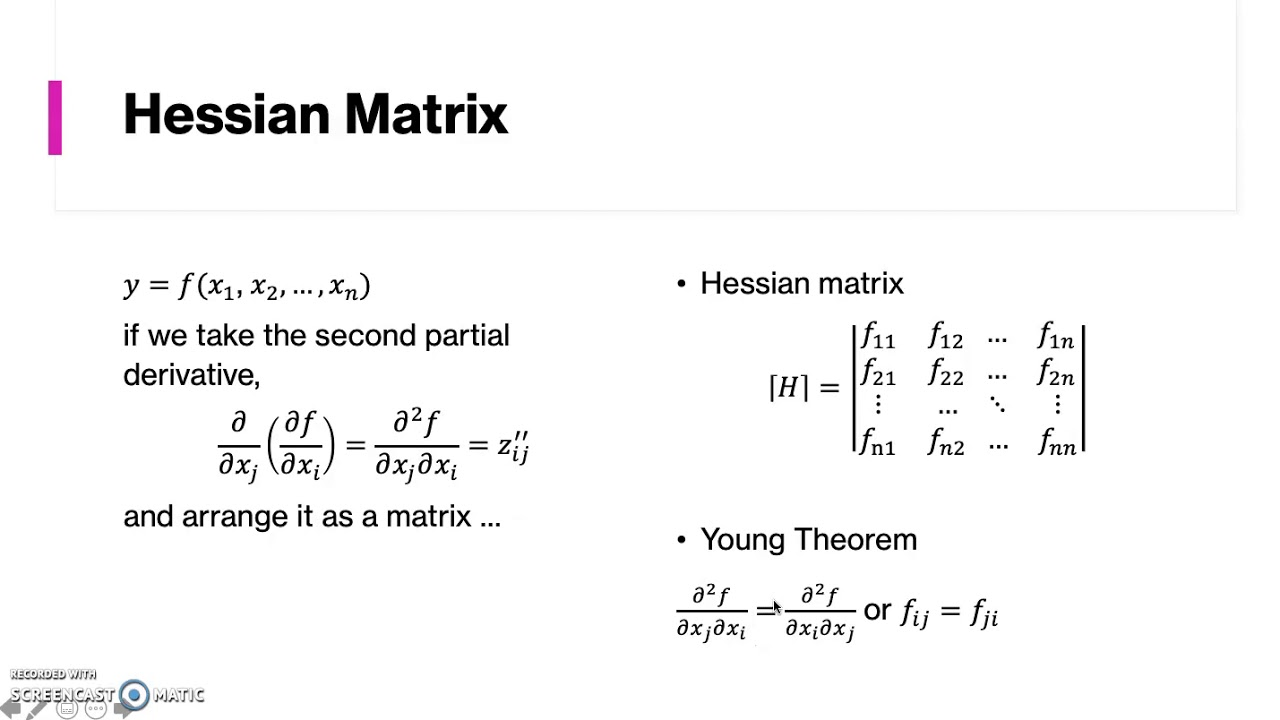

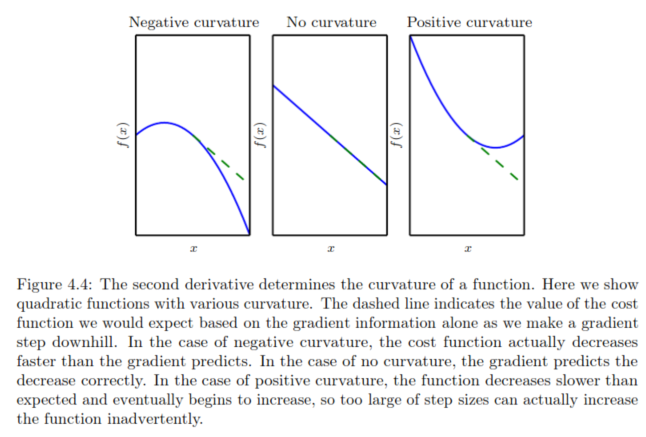

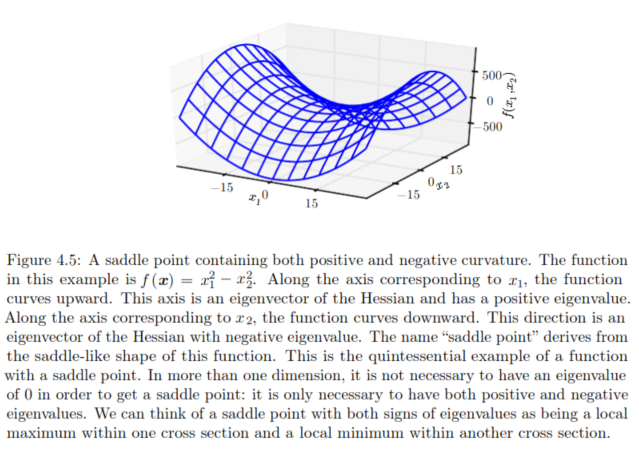

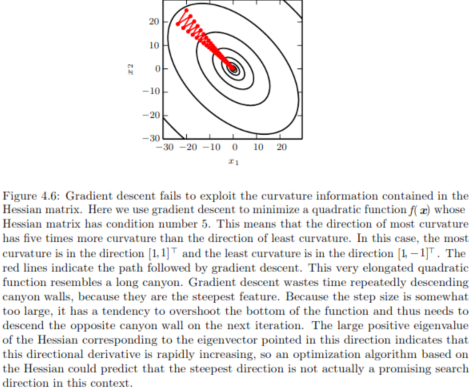

## Constrained Optimization

Sometimes we wish not only to maximize or minimize a function $f(x)$ over all possible values of $x$. Instead, we may wish to find the maximal or minimal value of $f(x)$ for values of $x$ in some set $S$. This is known as **constrained optimization**. Points $x$ that lie within the set $S$ are called **feasible points** in constrained optimization terminology.

We often wish to find a solution that is small in some sense. A common approach in such situations is to impose a norm constraint, such as:

$$
\|x\|_1 \leq c
$$

One simple approach to constrained optimization is to modify gradient descent while taking the constraint into account. If we use a small constant step size $\epsilon$, we can make gradient descent steps, then project the result back into $S$. If we use a line search, we can search only over step sizes $\epsilon$ that yield new $x$ points that are feasible, or we can project each point on the line back into the constraint region.

When possible, this method can be made more efficient by projecting the gradient into the tangent space of the feasible region before taking the step or beginning the line search (Rosen, 1960).

A more sophisticated approach is to design a different, unconstrained optimization problem whose solution can be converted into a solution to the original constrained problem. 

For example, if we want to minimize $f(x)$ for $x \in \mathbb{R}^2$ with $x$ constrained to have exactly unit $L_2$ norm, we can instead minimize $g(\theta) = f([\cos(\theta), \sin(\theta)]^\top)$ with respect to $\theta$, then return $[\cos(\theta), \sin(\theta)]$ as the solution to the original problem. This approach requires creativity; the transformation must be designed specifically for each case.

### The Karush–Kuhn–Tucker (KKT) Approach

The KKT approach provides a general solution to constrained optimization. We define a new function called the **generalized Lagrangian**.

To define the Lagrangian, we first need to describe $S$ in terms of equations and inequalities. We want a description of $S$ in terms of $m$ functions $g_i(x)$ and $n$ functions $h_j(x)$ such that:

$$
S = \{ x \mid \forall i,\, g_i(x) = 0 \text{ and } \forall j,\, h_j(x) \leq 0 \}
$$

- The equations $g_i(x) = 0$ are called **equality constraints**.
- The inequalities $h_j(x) \leq 0$ are called **inequality constraints**.

We introduce new variables $\lambda_i$ and $\alpha_j$ for each constraint. These are called the **KKT multipliers**. The **generalized Lagrangian** is then defined as:

$$
\mathcal{L}(x, \lambda, \alpha) = f(x) + \sum_i \lambda_i g_i(x) + \sum_j \alpha_j h_j(x)
$$

We can now solve a constrained minimization problem using **unconstrained optimization** of the generalized Lagrangian. Assuming at least one feasible point exists and $f(x)$ is not permitted to have value $\infty$, we have:

$$
\min_x \max_{\lambda, \alpha \geq 0} \mathcal{L}(x, \lambda, \alpha)
$$

This has the same optimal objective function value and set of optimal points as:

$$
\min_{x \in S} f(x)
$$

This follows because any time the constraints are satisfied:

$$
\max_{\lambda, \alpha \geq 0} \mathcal{L}(x, \lambda, \alpha) = f(x)
$$

And any time a constraint is violated:

$$
\max_{\lambda, \alpha \geq 0} \mathcal{L}(x, \lambda, \alpha) = \infty
$$

These properties guarantee that no infeasible point will ever be optimal and that the optimum within the feasible points is unchanged.

To perform **constrained maximization**, we can construct the generalized Lagrange function of $-f(x)$, leading to the optimization problem:

$$
\min_x \max_{\lambda, \alpha \geq 0} \left[ f(x) + \sum_i \lambda_i g_i(x) + \sum_j \alpha_j h_j(x) \right]
$$

Alternatively, we may convert this to a problem with **maximization in the outer loop**:

$$
\max_{\lambda, \alpha \geq 0} \min_x \left[ f(x) + \sum_i \lambda_i g_i(x) + \sum_j \alpha_j h_j(x) \right]
$$

The sign of the term for the equality constraints does not matter; we may define it with addition or subtraction, because the optimization is free to choose any sign for each $\lambda_i$.

### Active Constraints

The inequality constraints are particularly interesting. We say that a constraint $h_i(x)$ is **active** if $h_i(x^*) = 0$. 

If a constraint is not active, then the solution would remain at least a local solution even if the constraint were removed. However, the point found at convergence remains a stationary point whether or not the inactive constraints are included.

Because an inactive $h_i(x)$ has negative value, then the solution to:

$$
\min_x \max_{\lambda} \max_{\alpha \geq 0} \mathcal{L}(x, \lambda, \alpha)
$$

will have $\alpha_i = 0$. Thus, at the solution, $\alpha_i h_i(x) = 0$ for all $i$.

This condition means that **at least one of** the constraints $\alpha_i \geq 0$ or $h_i(x) \leq 0$ must be active at the solution.

To gain intuition: either the solution is on the boundary imposed by the inequality (so its KKT multiplier $\alpha_i$ influences the solution), or the inequality has no influence on the solution (so $\alpha_i = 0$).

### KKT Conditions

The properties that define the optimal solution in constrained optimization are:

- The gradient of the generalized Lagrangian is zero.
- All constraints on both $x$ and the KKT multipliers are satisfied.
- The **complementary slackness** condition holds: $\alpha_i h_i(x) = 0$ for all $i$.

These are called the **Karush-Kuhn-Tucker (KKT) conditions** (Karush, 1939; Kuhn and Tucker, 1951). Together, these properties characterize the optimal points of constrained optimization problems.


## Optimisasi Terbatas (Constrained Optimization)

Dalam beberapa kasus, kita tidak hanya ingin memaksimalkan atau meminimalkan suatu fungsi $f(x)$ untuk semua nilai $x$ yang mungkin, tetapi kita ingin mencari nilai maksimum atau minimum dari $f(x)$ untuk nilai-nilai $x$ yang berada dalam suatu himpunan $S$. Ini disebut sebagai **optimisasi terbatas** (*constrained optimization*). Titik-titik $x$ yang berada dalam himpunan $S$ disebut **titik layak** (*feasible points*) dalam terminologi optimisasi terbatas.

Sering kali kita ingin mencari solusi yang sekecil mungkin dalam arti tertentu. Pendekatan umum untuk situasi ini adalah dengan memberikan batasan norma, contohnya:

$$
\|x\|_1 \leq c
$$

Pendekatan sederhana untuk optimisasi terbatas adalah memodifikasi algoritma *gradient descent* dengan mempertimbangkan batasan tersebut. Jika kita menggunakan *step size* kecil $\epsilon$, kita bisa melakukan langkah-langkah *gradient descent* lalu memproyeksikan hasilnya kembali ke dalam himpunan $S$. Jika menggunakan pencarian garis (*line search*), kita hanya mencari nilai $\epsilon$ yang menghasilkan titik $x$ baru yang masih layak (feasible), atau kita bisa memproyeksikan setiap titik pada garis tersebut ke dalam wilayah yang dibatasi.

Jika memungkinkan, metode ini bisa dibuat lebih efisien dengan memproyeksikan gradien ke dalam *tangent space* dari wilayah yang layak sebelum melakukan langkah atau memulai pencarian garis (Rosen, 1960).

Pendekatan yang lebih canggih adalah dengan mendesain ulang masalah optimisasi menjadi masalah tak terbatas (*unconstrained optimization*) yang solusinya bisa dikonversi menjadi solusi untuk masalah semula.

Sebagai contoh, jika kita ingin meminimalkan $f(x)$ untuk $x \in \mathbb{R}^2$ dengan batasan bahwa $x$ memiliki norma $L_2$ yang tepat sebesar 1, maka kita bisa mengubahnya menjadi meminimalkan $g(\theta) = f([\cos(\theta), \sin(\theta)]^\top)$ terhadap $\theta$, lalu mengembalikan $[\cos(\theta), \sin(\theta)]$ sebagai solusi untuk masalah awal. Pendekatan ini memerlukan kreativitas karena transformasinya harus dirancang khusus untuk setiap kasus.

## Pendekatan Karush–Kuhn–Tucker (KKT)

Pendekatan KKT menyediakan solusi umum untuk optimisasi terbatas. Kita mendefinisikan suatu fungsi baru yang disebut **Lagrangian umum** (*generalized Lagrangian*).

Untuk mendefinisikan Lagrangian, pertama-tama kita perlu menyatakan himpunan $S$ dalam bentuk persamaan dan pertidaksamaan. Kita ingin mendeskripsikan $S$ dalam bentuk $m$ fungsi $g_i(x)$ dan $n$ fungsi $h_j(x)$, sehingga:

$$
S = \{ x \mid \forall i,\, g_i(x) = 0 \text{ dan } \forall j,\, h_j(x) \leq 0 \}
$$

- Persamaan $g_i(x) = 0$ disebut sebagai **kendala kesetaraan** (*equality constraints*).
- Pertidaksamaan $h_j(x) \leq 0$ disebut sebagai **kendala ketaksamaan** (*inequality constraints*).

Kita memperkenalkan variabel baru $\lambda_i$ dan $\alpha_j$ untuk setiap kendala. Variabel-variabel ini disebut **pengali KKT** (*KKT multipliers*). Fungsi **Lagrangian umum** kemudian didefinisikan sebagai:

$$
\mathcal{L}(x, \lambda, \alpha) = f(x) + \sum_i \lambda_i g_i(x) + \sum_j \alpha_j h_j(x)
$$

Sekarang kita bisa menyelesaikan masalah optimisasi terbatas menggunakan **optimisasi tak terbatas** dari fungsi Lagrangian ini. Dengan asumsi bahwa terdapat paling tidak satu titik layak dan $f(x)$ tidak boleh bernilai tak hingga, kita bisa menyatakan:

$$
\min_x \max_{\lambda, \alpha \geq 0} \mathcal{L}(x, \lambda, \alpha)
$$

Nilai optimal dan titik optimal dari bentuk ini sama dengan:

$$
\min_{x \in S} f(x)
$$

Hal ini berlaku karena jika semua kendala terpenuhi:

$$
\max_{\lambda, \alpha \geq 0} \mathcal{L}(x, \lambda, \alpha) = f(x)
$$

Dan jika salah satu kendala dilanggar:

$$
\max_{\lambda, \alpha \geq 0} \mathcal{L}(x, \lambda, \alpha) = \infty
$$

Properti ini menjamin bahwa titik yang tidak layak tidak akan pernah menjadi solusi optimal dan solusi dalam wilayah layak tidak berubah.

Untuk melakukan **maksimisasi terbatas**, kita bisa membentuk fungsi Lagrangian dari $-f(x)$, yang menghasilkan:

$$
\min_x \max_{\lambda, \alpha \geq 0} \left[ f(x) + \sum_i \lambda_i g_i(x) + \sum_j \alpha_j h_j(x) \right]
$$

Atau dapat dikonversi menjadi bentuk **maksimisasi dalam lingkar luar**:

$$
\max_{\lambda, \alpha \geq 0} \min_x \left[ f(x) + \sum_i \lambda_i g_i(x) + \sum_j \alpha_j h_j(x) \right]
$$

Tanda untuk kendala kesetaraan tidak terlalu penting; kita bisa menuliskannya dengan penjumlahan atau pengurangan, karena nilai $\lambda_i$ bebas mengambil tanda apa pun.

### Kendala Aktif (*Active Constraints*)

Kendala ketaksamaan memiliki karakteristik yang menarik. Kita katakan bahwa suatu kendala $h_i(x)$ adalah **aktif** jika $h_i(x^*) = 0$.

Jika suatu kendala tidak aktif, maka solusi akan tetap menjadi solusi lokal walaupun kendala tersebut dihapus. Namun, titik yang ditemukan saat konvergen akan tetap menjadi titik stasioner, apakah kendala yang tidak aktif disertakan atau tidak.

Karena jika $h_i(x)$ tidak aktif (bernilai negatif), maka pada solusi:

$$
\alpha_i = 0
$$

Artinya, pada solusi:

$$
\alpha_i h_i(x) = 0 \quad \text{untuk semua } i
$$

Kondisi ini berarti bahwa **setidaknya satu dari** $\alpha_i \geq 0$ atau $h_i(x) \leq 0$ harus aktif pada solusi.

Intuisi: jika solusi berada di batas kendala ketaksamaan, maka pengali KKT $\alpha_i$ akan mempengaruhi solusi. Jika tidak, maka kendala tidak mempengaruhi solusi dan $\alpha_i = 0$.

### Kondisi KKT

Properti yang mendefinisikan solusi optimal dalam optimisasi terbatas adalah:

- Gradien dari fungsi Lagrangian umum bernilai nol.
- Semua kendala terhadap $x$ dan pengali KKT dipenuhi.
- Kondisi **slackness komplementer** (*complementary slackness*) terpenuhi: $\alpha_i h_i(x) = 0$ untuk semua $i$.

Properti-properti ini dikenal sebagai **Kondisi Karush-Kuhn-Tucker (KKT)** (Karush, 1939; Kuhn dan Tucker, 1951), yang mendeskripsikan titik-titik optimal dalam masalah optimisasi terbatas.


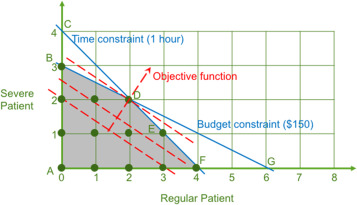